In [1]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
df = pd.read_pickle("outputs/df_cleaned.pickle")

In [3]:
features = df.iloc[:, :-1]
response = df.iloc[:, -1]
le = LabelEncoder().fit(response)
features_scaled = StandardScaler().fit_transform(features)
response_tf = le.transform(response)

In [4]:
X_train, x_test, y_train, y_test = train_test_split(
    features_scaled,
    response_tf,
    test_size=0.2,
    random_state=42
)

In [5]:
model = Sequential()

In [6]:
n_cols = X_train.shape[1]

In [7]:
model.add(Dense(125, activation="relu", input_shape=(n_cols,)))
model.add(Dropout(0.5))
model.add(Dense(125, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(125, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
early_stopping_monitor = EarlyStopping(patience=10)
model.compile(
    optimizer =adam,
    loss='binary_crossentropy', 
    metrics =['accuracy'],
)

In [9]:
history = model.fit(
    X_train,
    y_train, 
    validation_split=0.2,
    batch_size=500, 
    epochs=200,
    #callbacks=[early_stopping_monitor]
)

Instructions for updating:
Use tf.cast instead.
Train on 12800 samples, validate on 3200 samples
Epoch 1/200
12800/12800 [==============================] - 1s 46us/step - loss: 0.5990 - acc: 0.7392 - val_loss: 0.5589 - val_acc: 0.7547
Epoch 2/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5441 - acc: 0.7612 - val_loss: 0.5489 - val_acc: 0.7534
Epoch 3/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5391 - acc: 0.7639 - val_loss: 0.5407 - val_acc: 0.7544
Epoch 4/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5339 - acc: 0.7645 - val_loss: 0.5414 - val_acc: 0.7547
Epoch 5/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5325 - acc: 0.7641 - val_loss: 0.5371 - val_acc: 0.7547
Epoch 6/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5312 - acc: 0.7641 - val_loss: 0.5482 - val_acc: 0.7541
Epoch 7/200
12800/12800 [==============================] - 0s 11us/step - l

Epoch 58/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5214 - acc: 0.7673 - val_loss: 0.5340 - val_acc: 0.7559
Epoch 59/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5215 - acc: 0.7670 - val_loss: 0.5336 - val_acc: 0.7559
Epoch 60/200
12800/12800 [==============================] - 0s 12us/step - loss: 0.5198 - acc: 0.7680 - val_loss: 0.5396 - val_acc: 0.7566
Epoch 61/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5215 - acc: 0.7672 - val_loss: 0.5392 - val_acc: 0.7547
Epoch 62/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5205 - acc: 0.7668 - val_loss: 0.5367 - val_acc: 0.7547
Epoch 63/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5250 - acc: 0.7673 - val_loss: 0.5353 - val_acc: 0.7556
Epoch 64/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5205 - acc: 0.7669 - val_loss: 0.5323 - val_acc: 0.7553
Epoch 65/200
12800/12800 [=

Epoch 117/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5181 - acc: 0.7676 - val_loss: 0.5360 - val_acc: 0.7550
Epoch 118/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5144 - acc: 0.7677 - val_loss: 0.5376 - val_acc: 0.7559
Epoch 119/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5163 - acc: 0.7670 - val_loss: 0.5353 - val_acc: 0.7553
Epoch 120/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5148 - acc: 0.7678 - val_loss: 0.5341 - val_acc: 0.7553
Epoch 121/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5144 - acc: 0.7673 - val_loss: 0.5374 - val_acc: 0.7559
Epoch 122/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5140 - acc: 0.7676 - val_loss: 0.5319 - val_acc: 0.7559
Epoch 123/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5141 - acc: 0.7670 - val_loss: 0.5353 - val_acc: 0.7553
Epoch 124/200
12800/

12800/12800 [==============================] - 0s 13us/step - loss: 0.5131 - acc: 0.7695 - val_loss: 0.5358 - val_acc: 0.7562
Epoch 176/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5101 - acc: 0.7696 - val_loss: 0.5340 - val_acc: 0.7569
Epoch 177/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5101 - acc: 0.7687 - val_loss: 0.5333 - val_acc: 0.7566
Epoch 178/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5092 - acc: 0.7702 - val_loss: 0.5328 - val_acc: 0.7572
Epoch 179/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5072 - acc: 0.7688 - val_loss: 0.5329 - val_acc: 0.7591
Epoch 180/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5111 - acc: 0.7692 - val_loss: 0.5321 - val_acc: 0.7572
Epoch 181/200
12800/12800 [==============================] - 0s 11us/step - loss: 0.5105 - acc: 0.7692 - val_loss: 0.5379 - val_acc: 0.7569
Epoch 182/200
12800/12800 [=======

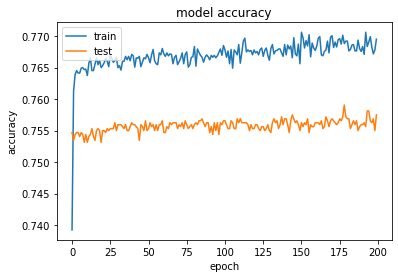

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()